In [19]:
#빅데이터분석기사 7회 실기 3유형 1. 상관계수 찾기

#boston 데이터 중에서 상관관계가 가장 작은 값을 구하시오.
import pandas as pd

df = pd.read_csv("C://Users//sam99//Desktop//컴퓨터공부//빅데이터분석기사//실기//HousingData.csv")
df.corr()

#대각선을 제외하고 상삼각 행렬만 남기기(np.triu: 상삼각 행렬, k=1로 설정하여)
import numpy as np
corr_matrix = df.corr()
corr_matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#상삼각 행렬에서 가장 큰 상관계수 찾기
max_corr_value = upper_tri.stack().max()
max_corr_value #0.910
max_corr_pairs = upper_tri.stack().idxmax()
max_corr_pairs #('RAD', "TAX")
#상삼각 행렬에서 가장 작은 상관계수 찾기
lower_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
min_corr_value = lower_tri.stack().min()
min_corr_value #-0.76923
min_corr_pairs = lower_tri.stack().idxmin()
min_corr_pairs #('NOX', 'DIS')

('NOX', 'DIS')

In [ ]:
#2. 결정계수 및 로그오즈비 구하기
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df = df.dropna()
tips.shape, df.shape

import statsmodels.api as sm

X = df['total_bill']
y = df['tip']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

#구축된 모형에 대한 결정계수의 값을 출력하시오.
import numpy as np

np.round(model.rsquared, 3)

#tip에 대한 키의 오즈비(Odds Ratio, total bill)의 변화가 몸무게 로그 오즈에 미치는 영향을 출력하시오.
#모델에 대한 회귀 계수 -> 지수 변환을 하면 오즈비를 구할 수 있다.
model.params

import numpy as np
odds = np.exp(model.params['total_bill'])
np.round(odds,3)
#로지스틱 회귀분석: 종속변수가 이분형(남자, 여자)과 같이 연속형이 아닌 경우에 활용된다. 
#종속형 변수 적절한 함수를 이용하여 연속형 변수로 변형한다. log(p/1-p)
#종속변수가 y가 이분형이 아니라 0~1사이의 확률값으로 변형한다.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 06 May 2025   Prob (F-statistic):           6.69e-34
Time:                        08:28:26   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

Optimization terminated successfully.
         Current function value: 0.640454
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  성별_변환   No. Observations:                  244
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 May 2025   Pseudo R-squ.:                 0.01682
Time:                        08:59:22   Log-Likelihood:                -156.27
converged:                       True   LL-Null:                       -158.94
Covariance Type:            nonrobust   LLR p-value:                   0.02075
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill    -0.0375      0.020     -1.852      0.064      -0.077       0.002
tip            0.0414      0.

C:\Users\sam99\AppData\Local\Temp\ipykernel_312820\4027441225.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['성별_변환'] = df['sex'].replace({'Male':0, 'Female':1})
C:\Users\sam99\AppData\Local\Temp\ipykernel_312820\4027441225.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['성별_변환'] = df['sex'].replace({'Male':0, 'Female':1})
C:\Users\sam99\AppData\Local\Temp\ipykernel_312820\4027441225.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

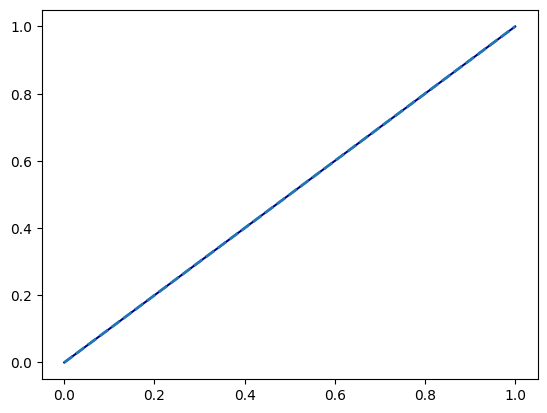

In [27]:
#문제3. 독립변수 total_bill으로 sex를 이용하여 성별을 분류하는 모형을 구축하시오. 
#statsmodels.api에 포함되어 있는 logit함수를 이용하시오.

import seaborn as sns
import statsmodels.api as sm
tips = sns.load_dataset('tips')
 
df = tips.copy()
df = df.dropna()

tips.shape, df.shape

df['sex'].value_counts()
#성별 변환 - 문자에서 숫자 범주형으로
df['성별_변환'] = df['sex'].replace({'Male':0, 'Female':1})
X = df.loc[:,['total_bill', 'tip']]
y = df['성별_변환']

model = sm.Logit(y,X).fit()
print(model.summary())

#키, 몸무게에 대한 유의확률을 출력하고 최대 유의확률 값을 구하시오.
model.pvalues

import numpy as np
max_pvalues =np.max(model.pvalues)
max_pvalues

#훈련 평가 70-30으로 구분하여 데이터에 대한 혼동행렬 ROC_AUC를 출력하시오.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import pandas as pd
import numpy as np
import statsmodels.api as snm
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(12)

tips =sns.load_dataset("tips")
df = tips.copy()
df = df.dropna()
df.loc[:, '성별_변환'] = df['sex'].replace({'Male':0, 'Female':1})
#df.loc[:, '성별_변환'] = df['smoker'].replace({'Yes':0,'No':1})
print(tips.shape, df.shape)

#데이터 셋을 분리한다.
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state =12
)

#모델을 생성한다.
model=sm.Logit(y_train,X_train).fit()
print(model.summary())

#모델 예측값을 생성한다.
y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba>=0.5,1,0)

confusion_matrix(y_test, y_pred)

#roc_auc_score(y_test, y_pred) AUC 점수를 바로 구하는 코드
roc_auc_score(y_test, y_pred) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr) #AUC 점수를 ROC_CURVE 메서드를 활용한다 
fig, ax =plt.subplots()
ax.plot(fpr, tpr, color='darkblue')
ax.plot([0,1],[0,1],lw=2, linestyle='--')
plt.show()